In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import open3d as o3d
import numpy as np
import math 
import copy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

### Viewer 함수 정의

In [58]:
### Open3D Point Cloud Viewer
def pcd_viewer(pcd):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)
    vis.run()
    vis.destroy_window()

In [78]:
def ply_to_ndarray(ply):
    xyz_load = np.asarray(ply.points)
    return xyz_load

def get_pts(infile):
    if type(infile) == str:
        data = ply_to_ndarray(o3d.io.read_point_cloud(infile))
    else :
        data = ply_to_ndarray(infile)
    return data[:,0], data[:,1], data[:,2]

### Mplot3D Point Cloud Viewer (No Texture view)
def plot_pcd(infile):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    x,y,z = get_pts(infile)
    data = ply_to_ndarray(infile)

    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

### 평면 추정

In [104]:
data = []
pcd = o3d.io.read_point_cloud("best/centerslowdata/fragment_014.ply")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                             ransac_n=3,
                                             num_iterations=1000)
[pa, pb, pc, pd] = plane_model
print(f"Plane equation: {pa:.2f}x + {pb:.2f}y + {pc:.2f}z + {pd:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])

outlier_cloud = pcd.select_by_index(inliers, invert=True)

###############2
plane2_model, inliers2 = outlier_cloud.segment_plane(distance_threshold=0.01,
                                                         ransac_n=3,
                                                         num_iterations=1000)
[pa2, pb2, pc2, pd2] = plane2_model
print(f"Plane equation2: {pa2:.2f}x + {pb2:.2f}y + {pc2:.2f}z + {pd2:.2f} = 0")
    
inlier2_cloud = outlier_cloud.select_by_index(inliers2)
inlier2_cloud.paint_uniform_color([0, 1.0, 0])

outlier2_cloud = outlier_cloud.select_by_index(inliers2, invert=True)

################3
plane3_model, inliers3 = outlier2_cloud.segment_plane(distance_threshold=0.01,
                                                          ransac_n=3,
                                                          num_iterations=1000)
[pa3, pb3, pc3, pd3] = plane3_model
print(f"Plane equation3: {pa3:.2f}x + {pb3:.2f}y + {pc3:.2f}z + {pd3:.2f} = 0")
inlier3_cloud = outlier2_cloud.select_by_index(inliers3)
inlier3_cloud.paint_uniform_color([0, 0, 1.0])

Plane equation: 0.46x + -0.52y + 0.72z + -1.45 = 0
Plane equation2: 0.97x + 0.22y + -0.04z + 1.20 = 0
Plane equation3: -0.06x + 0.88y + 0.48z + -1.11 = 0


PointCloud with 49488 points.

In [136]:
pcd_viewer(inlier_cloud)

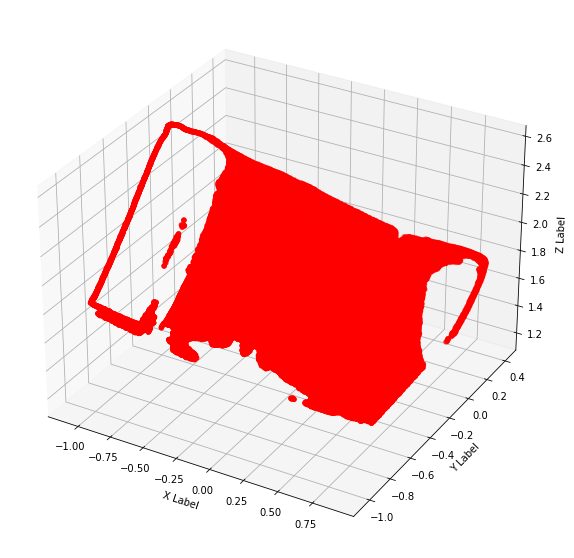

In [133]:
plot_pcd(inlier_cloud)

In [149]:
def plot_plane(pa, pb, pc):
    point  = np.array([0, 0, 0])
    normal = np.array([pa, pb, pc])
    d = -point.dot(normal)
    xx, yy = np.meshgrid(range(-3,3), range(-3,3))
    zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
    return xx, yy, zz

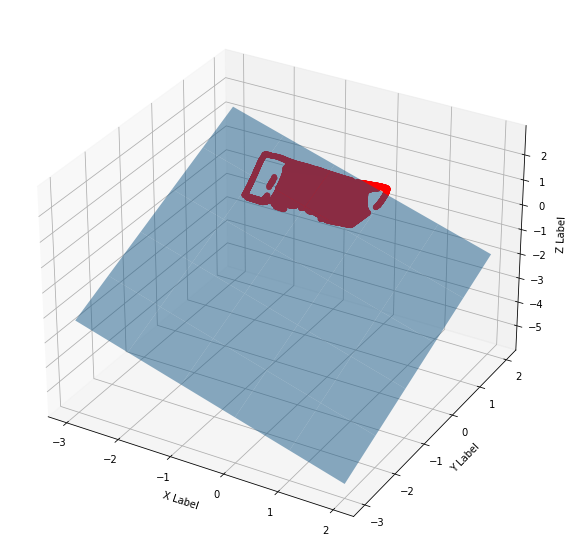

In [148]:
from matplotlib.collections import PolyCollection

# plot the surface
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x,y,z = get_pts(inlier_cloud)

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

xx, yy, zz = plot_plane(pa, pb, pc)
ax.plot_surface(xx, yy, zz, alpha = 0.5, linewidths=1)
xx, yy, zz = plot_plane(pa2, pb2, pc2)
#ax.plot_surface(xx, yy, zz, alpha = 0.5, linewidths=1)
xx, yy, zz = plot_plane(pa3, pb3, pc3)
#ax.plot_surface(xx, yy, zz, alpha = 0.5, linewidths=1)
#pc = PolyCollection(verts, )
#ax.add_collection(pc)
plt.show()


In [55]:
dddd[:,0]

array([-0.36621094, -0.37207031, -0.36621094, ..., -0.75242194,
       -0.74722993, -0.74860737])

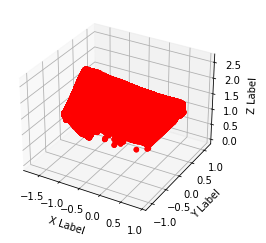

In [57]:




if __name__ == '__main__':
    infile = 'best/centerslowdata/fragment_014.ply'
    plot_ply(infile)